## Theoretical Background of the PI Controller

 **Transfer functions**
 <br>First order system
 $ G(s) = \frac {1}{1+T_o . s}$ 
 <br>
 The PI controler 
$ PI(s) = K_p + \frac{K_i}{s} = Kp \frac {1+T_i.s}{T_i.s} $
<br> where $ T_i = \frac{K_p}{K_i}$  
Open loop <br>
$ H(s)= G(s).PI(s)= \frac {1}{1+T_o . s}  Kp \frac {1+T_i.s}{T_i.s} = \frac {Kp }{T_i.s}\frac {1+T_i.s}{1+T_o . s} : (I)$ 
 <br><br>
**Methode 1: Cancellation and Dominant Pole Approximation**
<br> 
we chose: 
<br>
$T_i =T_o 
 \Rightarrow
 H(s)= \frac {K_p}{T_i.s}$
 <br>
Closed loop 
 <br>
$H_c(s)= \frac{H(s) }{ 1+H(s)}= \frac{1 }{ 1+\frac {1}{H(s)}} : (II)$ 
 <br>
$H_c(s)= \frac{1 }{ 1+\frac {T_i}{K_p}.s}= \frac{1 }{ 1+T_{oc}.s}$
 <br>
Where $ T_{oc} = \frac {T_i}{K_p}$
 <br><br>
Objective: To make the closed-loop system 𝑛 times faster than the initial system.
<br>
so : $ T_{oc} =\frac {T_o}{n} = \frac{T_i}{n}$ and 
$ T_{oc} = \frac {T_i}{K_p}$<br>
$ \Rightarrow \boxed{K_p = n} $<br>
And $ T_i =T_o =  \frac{K_p}{K_i}$  <br>
$  \Rightarrow K_i= \frac{K_p}{T_o}$<br>
$  \Rightarrow \boxed{K_i=\frac {n}{T_o}} $


**Methode 2: Dominant Pole Approximation**
 <br>
 From equation $ (II) $ <br>
$ Hc(s) = \frac{1}{1+ \frac {T_i.s}{K_p} \frac {1+T_o . s}{1+T_i.s} }  = \frac{1+T_i.s}{1+(T_i+\frac{T_i}{K_p}).s+\frac{T_i.T_o}{K_p}.s^2}$
 <br>
$Hc(s) ≈\frac{1}{1+2\zeta\frac{s}{w_n}+\frac{s^2}{w_n^2}} $
 <br>
if $ Ti.wn <<1 $
$ w_n^2 = \frac{K_p}{T_i.T_o} $ $(III)$
 <br>
 Where <br>
$ 2\zeta\frac{1}{w_n} = (T_i+\frac{T_i}{K_p}) $ 
 <br>
$ K_p = 2.\zeta.w_n.T_o-1$
 <br>
 And <br>
$ T_i= \frac{K_p}{w_n^2.T_o} $ 
<br>
The condition $(III)$ 
<br>
$ T_i.w_n ≪ 1  \Rightarrow  T_i.w_n = \frac{K_p}{w_n.T_o}=2*\zeta -\frac{1}{w_n.T_o} ≪ 1 $
<br>
for $ \zeta=1 \Rightarrow  w_n ≪ T_o $
<br><br> this methode work only if the closed loop is slow than the initial system

## Simulation of PI controller and RC first order system

### RC first order system

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
class FirstOrder:
    def __init__(self, To, Ts, A=1.0, y0=0.0):
        self.a = Ts / To
        self.A = A
        self.y = y0

    def step(self, u):
        self.y += self.a * (self.A * u - self.y)
        return self.y


class PI_cont:
    def __init__(self, Kp, Ki, Ts, y0=0.0):
        # Ti = Kp/Ki
        self.Kp = Kp
        self.Ki = Ki
        self.Ts = Ts
        self.integral = 0.0
        self.y = y0

    def step(self, error):
        self.integral += error * self.Ts
        self.y = self.Kp * error + self.Ki * self.integral
        return self.y
class limiter: 
    def _init(self, lower, upper): 
        self.L = lower
        self.U = upper
    def step(self, u):
        if u < self.L: 
            return self.L
        if u > self.U: 
            return self.U
        return u
        
class sim_first_1_controller_PI: 
    def __init__(self, Ts_sim, Ts_ctrl, Kp, Ki):
        self.Ts_sim = Ts_sim
        self.Ts_ctrl = Ts_ctrl
        self.Kp = Kp 
        self.Ki = Ki
    def sim(self, u):
        N = len(u)
        Ts = self.Ts_sim
        Ts_ctrl = self.Ts_ctrl
        Ts_n = int(Ts_ctrl/Ts)


        G1 = FirstOrder(To, Ts)
        G2 = FirstOrder(To, Ts)
        C  = PI_cont(Kp=Kp, Ki=Ki, Ts=Ts_ctrl)
        
        y1, y2 = [], []
        control2 = 0.0
        
        for i in range(N):
            # open-loop
            y1.append(G1.step(u[i]))
        
            # closed-loop with controller update every 10 steps (ZOH in between)
            e = u[i] - G2.y
            if i % Ts_n  == 0:
                control2 = C.step(e)
            y2.append(G2.step(control2))
        return np.array(y1), np.array(y2)

In [19]:
# RC sys
R=4660#meas
C=4.772e-6# nom 4.7uF
To=R*C

# System & controller
Kp = 3
Ti = To
Ki = Kp/Ti         

 
# simulation params
Ts_sim = 1e-6
Ts_ctrl = 100*Ts_sim

Sim_Model= sim_first_1_controller_PI(Ts_sim = Ts_sim , Ts_ctrl=Ts_ctrl, Kp=Kp, Ki=Ki)

In [20]:
Tsimulation  = 0.5

In [21]:
R=4660#meas
C=4.772e-6# nom 4.7uF
To=R*C
To

0.02223752

In [22]:
## Input 
N = int(Tsimulation/Ts_sim)
time = np.arange(0, Ts_sim  * N, Ts_sim )
u = np.ones(N)
u[0:N//10]=0
u[8*N//10:]=0.7

In [23]:
%%time 
y1, y2 = Sim_Model.sim(u)

CPU times: total: 875 ms
Wall time: 1.26 s


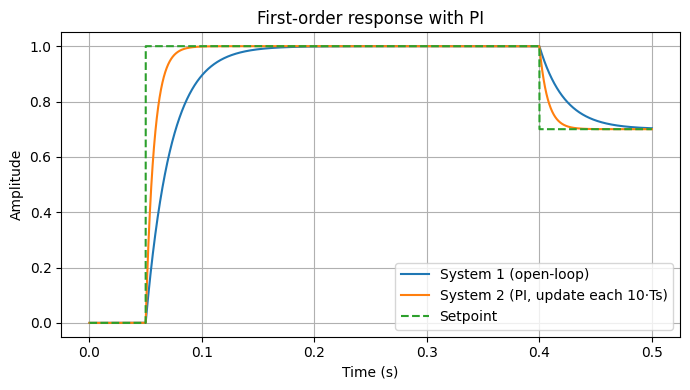

In [24]:
# Plot
plt.figure(figsize=(7,4))
plt.plot(time, y1, label='System 1 (open-loop)')
plt.plot(time, y2, label='System 2 (PI, update each 10·Ts)')
plt.plot(time, u, '--', label='Setpoint')
plt.xlabel('Time (s)'); plt.ylabel('Amplitude')
plt.title('First-order response with PI')
plt.legend(); plt.tight_layout()
plt.grid()
plt.show()



### Add a load RL to RC circuit 

In [25]:
# RC sys
R=4660#meas
C=4.772e-6# nom 4.7uF
To=R*C

# System & controller
Kp = 3
Ti = To
Ki = Kp/Ti         

 
# simulation params
Ts_sim = 10e-6
Ts_ctrl = 100e-6 # 100us 

Sim_Model= sim_first_1_controller_PI(Ts_sim = Ts_sim , Ts_ctrl=Ts_ctrl, Kp=Kp, Ki=Ki)

In [26]:
Tsimulation  = 0.5

In [27]:
1/np.inf

0.0

In [28]:
## Input 
N = int(Tsimulation/Ts_sim)
time = np.arange(0, Ts_sim  * N, Ts_sim )
u = np.ones(N)
#u[0:N//10]=0
#u[8*N//10:]=0.7
N

49999

In [29]:
# LOAD RESISTOR 
# H(s) = A/(1+A*To*s)
RL= 10e3
A= 1/(1+R/RL)
A

0.6821282401091405

In [30]:
N = len(u)
Ts = Ts_sim
Ts_ctrl = Ts_ctrl
Ts_n = int(Ts_ctrl/Ts)


G1 = FirstOrder(To, Ts)
G2 = FirstOrder(To, Ts)
C  = PI_cont(Kp=Kp, Ki=Ki, Ts=Ts_ctrl)

y1, y2 = [], []
control2 = 0.0
ycont = []
for i in range(N):
    if i ==N//3: 
        G1.a = Ts / (To*A)
        G1.A= A

        G2.a = Ts / (To*A)
        G2.A= A
    if i ==2*N//3: 
        G1.a = Ts / (To)
        G1.A= 1

        G2.a = Ts / (To)
        G2.A= 1
    # open-loop
    y1.append(G1.step(u[i]))

    # closed-loop with controller update every 10 steps (ZOH in between)
    e = u[i] - G2.y
    if i % Ts_n  == 0:
        control2 = C.step(e)
    ycont.append(control2)
    y2.append(G2.step(control2))
y1, y2 = np.array(y1), np.array(y2)

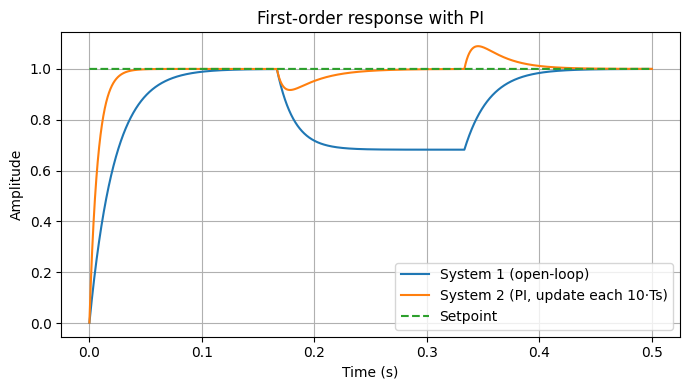

In [33]:
# Plot
plt.figure(figsize=(7,4))
plt.plot(time, y1, label='System 1 (open-loop)')
plt.plot(time, y2, label='System 2 (PI, update each 10·Ts)')
#plt.plot(time, ycont, label='PI controller output')
plt.plot(time, u, '--', label='Setpoint')
plt.xlabel('Time (s)'); plt.ylabel('Amplitude')
plt.title('First-order response with PI')
plt.legend(); plt.tight_layout()
plt.grid()
plt.show()



# END 

# PI ARDUINO CHANGE REF 3

In [9]:
import matplotlib.pyplot as plt 
import numpy as np

In [10]:
R=4660#meas
C=4.772e-6# nom 4.7uF
To=R*C
To

0.02223752

In [11]:
int(255*1.1/3.3)

85

In [12]:
#%pip install pyserial

In [13]:
ser.close()

NameError: name 'ser' is not defined

In [ ]:
import serial
import time

# Replace 'COM3' with your Arduino port (on Linux it may be '/dev/ttyUSB0')
ser = serial.Serial('COM5', 115200, timeout=1)  # baud rate must match Arduino
time.sleep(2)  # wait for Arduino reset
arr=[]


# Send '#' to Arduino
ser.write(b"#")  # sends the byte '#' to Arduino


try:
    while True:
        line = ser.readline().decode('utf-8').strip()  # read a line
        if line:
            #print(line)
            arr.append(line)
        if "END" in line:
            break
except KeyboardInterrupt:
    ser.close()


In [ ]:
ser.close()

In [ ]:
2**12

In [ ]:
prin = False 
vol=[]
time=[]
for i in range(len(arr)):
    l = arr[i]
    if 'END' in l: 
        break
    if "entry" in l:
        prin=True 

    elif prin: 
        vals = arr[i].split('\t')
        time .append(float(vals[0]))
        vol .append(float(vals[1]))
plt.plot(time, vol)
plt.plot

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame({"t":time,"v":vol})
df

In [ ]:
100-(df.t.diff().mean()-100)

In [ ]:
#df.to_csv("dfPI5.csv")

In [ ]:
#df = pd.read_csv("dfPI5.csv")

In [14]:
df.t=df.t-df.t.iloc[0]
df.plot(x='t',y='v')

NameError: name 'df' is not defined